<h1><center><b> Home Credit Default Risk - EDA </b></center></h1>

### Author: Abinav Yadamani
### UID: U1450286

<h1><center><b>Table of Contents</b></center></h1>

1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Import-&-Inspect-Dataset">Import & Inspect Dataset</a>
3. <a href="#3.-Target-Variable-Exploration">Target Variable Exploration</a>
4. <a href="#4.-Explore-the-relationship-between-target-and-predictors">Explore the relationship between target and predictors</a>
5. <a href="#5.-Missing-Value-Analysis-and-Imputation">Missing Value Analysis and Imputation</a>
6. <a href="#6.-Univariate-Analysis">Univariate Analysis</a>
7. <a href="#7.-Bivariate-Analysis">Bivariate Analysis</a>
8. <a href="#8.-Joining-the-Bureau-Table">Joining the Bureau Table</a>
9. <a href="#9.-Data-Transformation---One-Hot-encoding">Data Transformation - One Hot encoding</a>
10. <a href="#10.-EDA-Summary-&-Next-Steps">EDA Summary & Next Steps</a>

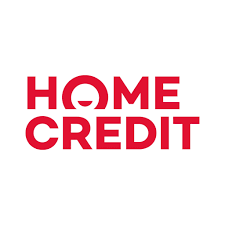






## 1. Introduction

Many people struggle to get loans due to insufficient or non-existent credit histories and this population is often taken advantage of by untrustworthy lenders. Home Credit, a consumer finance firm provides loans dedicated to the unbanked population. This financial inclusion effort often costs Home Credit as it involves a high risk of loan defaults. However, the business strives to ensure that clients capable of repayment are not rejected from lending. Hence, to be able to take better lending decisions, the firm wants to use historical loan application data to predict whether or not an applicant will be able to repay the loan.



The solution to this problem would include the development of supervised predictive classification models since we have historical labelled data and as the outcome of the target variable is binary with values of 0 and 1, indicating that the potential customer will repay the loan on time or will have difficulty repaying loan respectively. This involves Logistic Regression and use of ensemble methods for extracting a list of customers with higher probabilities of loan repayment. The client’s repayment prediction will be based on alternate data to loan history such as telco and transactional information.

Before we delve into building models, lets perform EDA. EDA can be categorized into the following:
1. Import & inspect dataset along with the target variable
2. Explore the relationship between target and predictors
3. Scope of missing values; imputing
4. One hot encoding of the categorical variables
5. Univariate analysis
6. Bivariate analysis
7. Testing for Hypothesis
8. Joining the Bureau and previous application tables and inspecting again

## 2. Import & Inspect Dataset

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [2]:
# reading the application_train files and displaying the shape
application_train = pd.read_csv(r"C:\Users\u1450286\Documents\Fall\Capstone Initiation\application_train.csv")
bureau = pd.read_csv(r"C:\Users\u1450286\Documents\Fall\Capstone Initiation\bureau.csv")
prev_app = pd.read_csv(r"C:\Users\u1450286\Documents\Fall\Capstone Initiation\previous_application.csv")

application_train.shape

(307511, 122)

In [3]:
# Modifying the default column properties to display more number of columns
pd.set_option('display.max_columns', 130)
pd.set_option('display.width', 500)

# printing 2 rows
application_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Target Variable Exploration

In [4]:
# Target value proportions
application_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**This shows that the target variable in the dataset is imbalanced. About 91.92% of the population in the train set repaid on time. Due to this imbalance, we might have to perform stratified sampling while creating train and test sets. Moreover, 91.92 being the majority class accuracy becomes the accuracy benchmark for our predictive machine learning models. **

Text(0.5, 1.0, 'Count of Target Variable values')

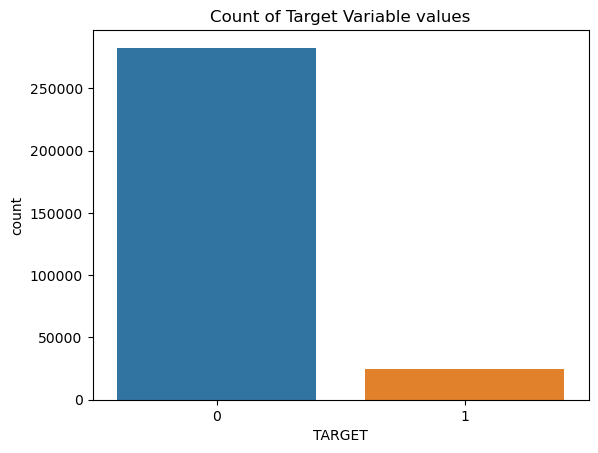

In [5]:
# visulaizing through a count plot
sns.countplot(x ='TARGET', data=application_train)
plt.title('Count of Target Variable values')

## 4. Explore the relationship between target and predictors

In [6]:
# correlation matrix
cor = pd.DataFrame(application_train.corr())
cor = cor.sort_values('TARGET',ascending=False)

In [7]:
# extracting the column that shows only the correlation with the target variable
cor = cor.iloc[1:,1]

# Top Positive & Negative correlated predictors with the target variable
print('Positively correlated top 5 predictors:\n\n', cor.head(5))
print('\n\n Negatively correlated top 5 predictors:\n\n',cor.tail(5).sort_values(ascending=True))

Positively correlated top 5 predictors:

 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64


 Negatively correlated top 5 predictors:

 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


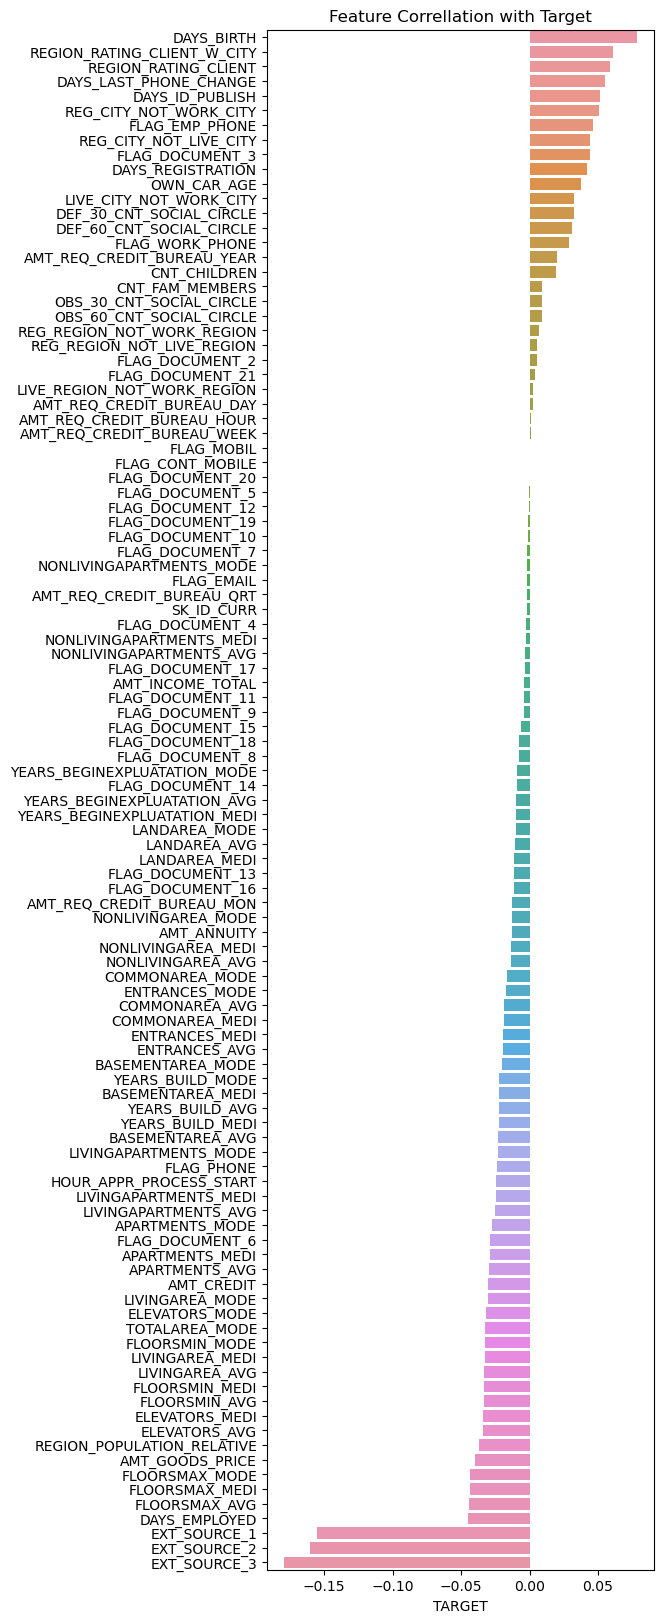

In [8]:
# Visualizing correlation
plt.figure(figsize=(5, 20))
sns.barplot(y=cor.index, x=cor)
plt.title("Feature Correllation with Target")
plt.show()

## 5. Missing Value Analysis and Imputation



In [9]:
# Modifying the default row properties to display more number of rows
pd.set_option('display.max_rows', 70)

# missing values
missing_value = (application_train.isnull().mean() * 100).round()

# Create a new DataFrame to display the results
missing_info = pd.DataFrame({'Column Name': missing_value.index, 'Missing Percentage': missing_value.values})

# missing_info[missing_info['Missing Percentage']>0].sort_values('Missing Percentage',ascending=False)

We cannot be sure at this point to decide which columns to drop just by looking at the missing values and correlation. Lets merge missing value DF with the cor DF to display missing value percentages along with the correlation to the target variable.

In [10]:
# Displaying column missing value % along with its correlation with the target variable
cor = pd.DataFrame(cor)
missing_cor_df = pd.merge(missing_info, cor, left_on='Column Name', right_on = cor.index)
missing_cor_df[missing_cor_df['Missing Percentage']>0].sort_values('Missing Percentage',ascending=False).head(46)

,Column Name,Missing Percentage,TARGET
49,COMMONAREA_MODE,70.0,-0.016340
35,COMMONAREA_AVG,70.0,-0.018550
63,COMMONAREA_MEDI,70.0,-0.018573
57,NONLIVINGAPARTMENTS_MODE,69.0,-0.001557
71,NONLIVINGAPARTMENTS_MEDI,69.0,-0.002757
43,NONLIVINGAPARTMENTS_AVG,69.0,-0.003176
69,LIVINGAPARTMENTS_MEDI,68.0,-0.024621
53,FLOORSMIN_MODE,68.0,-0.032698
67,FLOORSMIN_MEDI,68.0,-0.033394
55,LIVINGAPARTMENTS_MODE,68.0,-0.023393


**Dropping columns with missing value percentage greater than 48% since next highest in the sorted list is only 20%. However, External source 1 is one of the important predictors from the correlation matrix. Hence, lets drop all the columns with missing value percentage greater than 48% but excluding EXT_SOURCE_1.**

In [11]:
# Extracting columns with missing value percent greater than 48
missing_cor_df = missing_cor_df[missing_cor_df['Missing Percentage'] >= 48]
missing_cor_columns = missing_cor_df[missing_cor_df['Column Name'] != 'EXT_SOURCE_1']['Column Name']

In [12]:
# dropping columns with missing value percent greater than 48
application_train_clean = application_train.drop(columns=missing_cor_columns, axis=1)
application_train_clean.shape

(307511, 78)

### Missing Value Imputation



Imputing the remaining missing column values of object type variables with mode and numeric type with median:

In [13]:
for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'object':
        application_train_clean[column].fillna(application_train_clean[column].mode()[0], inplace=True)

for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'float':
        application_train_clean[column].fillna(application_train_clean[column].median(), inplace=True)

Verifying missing value count in all columns

In [14]:
application_train_clean.isna().sum().sum()

0

# 6. Univariate Analysis

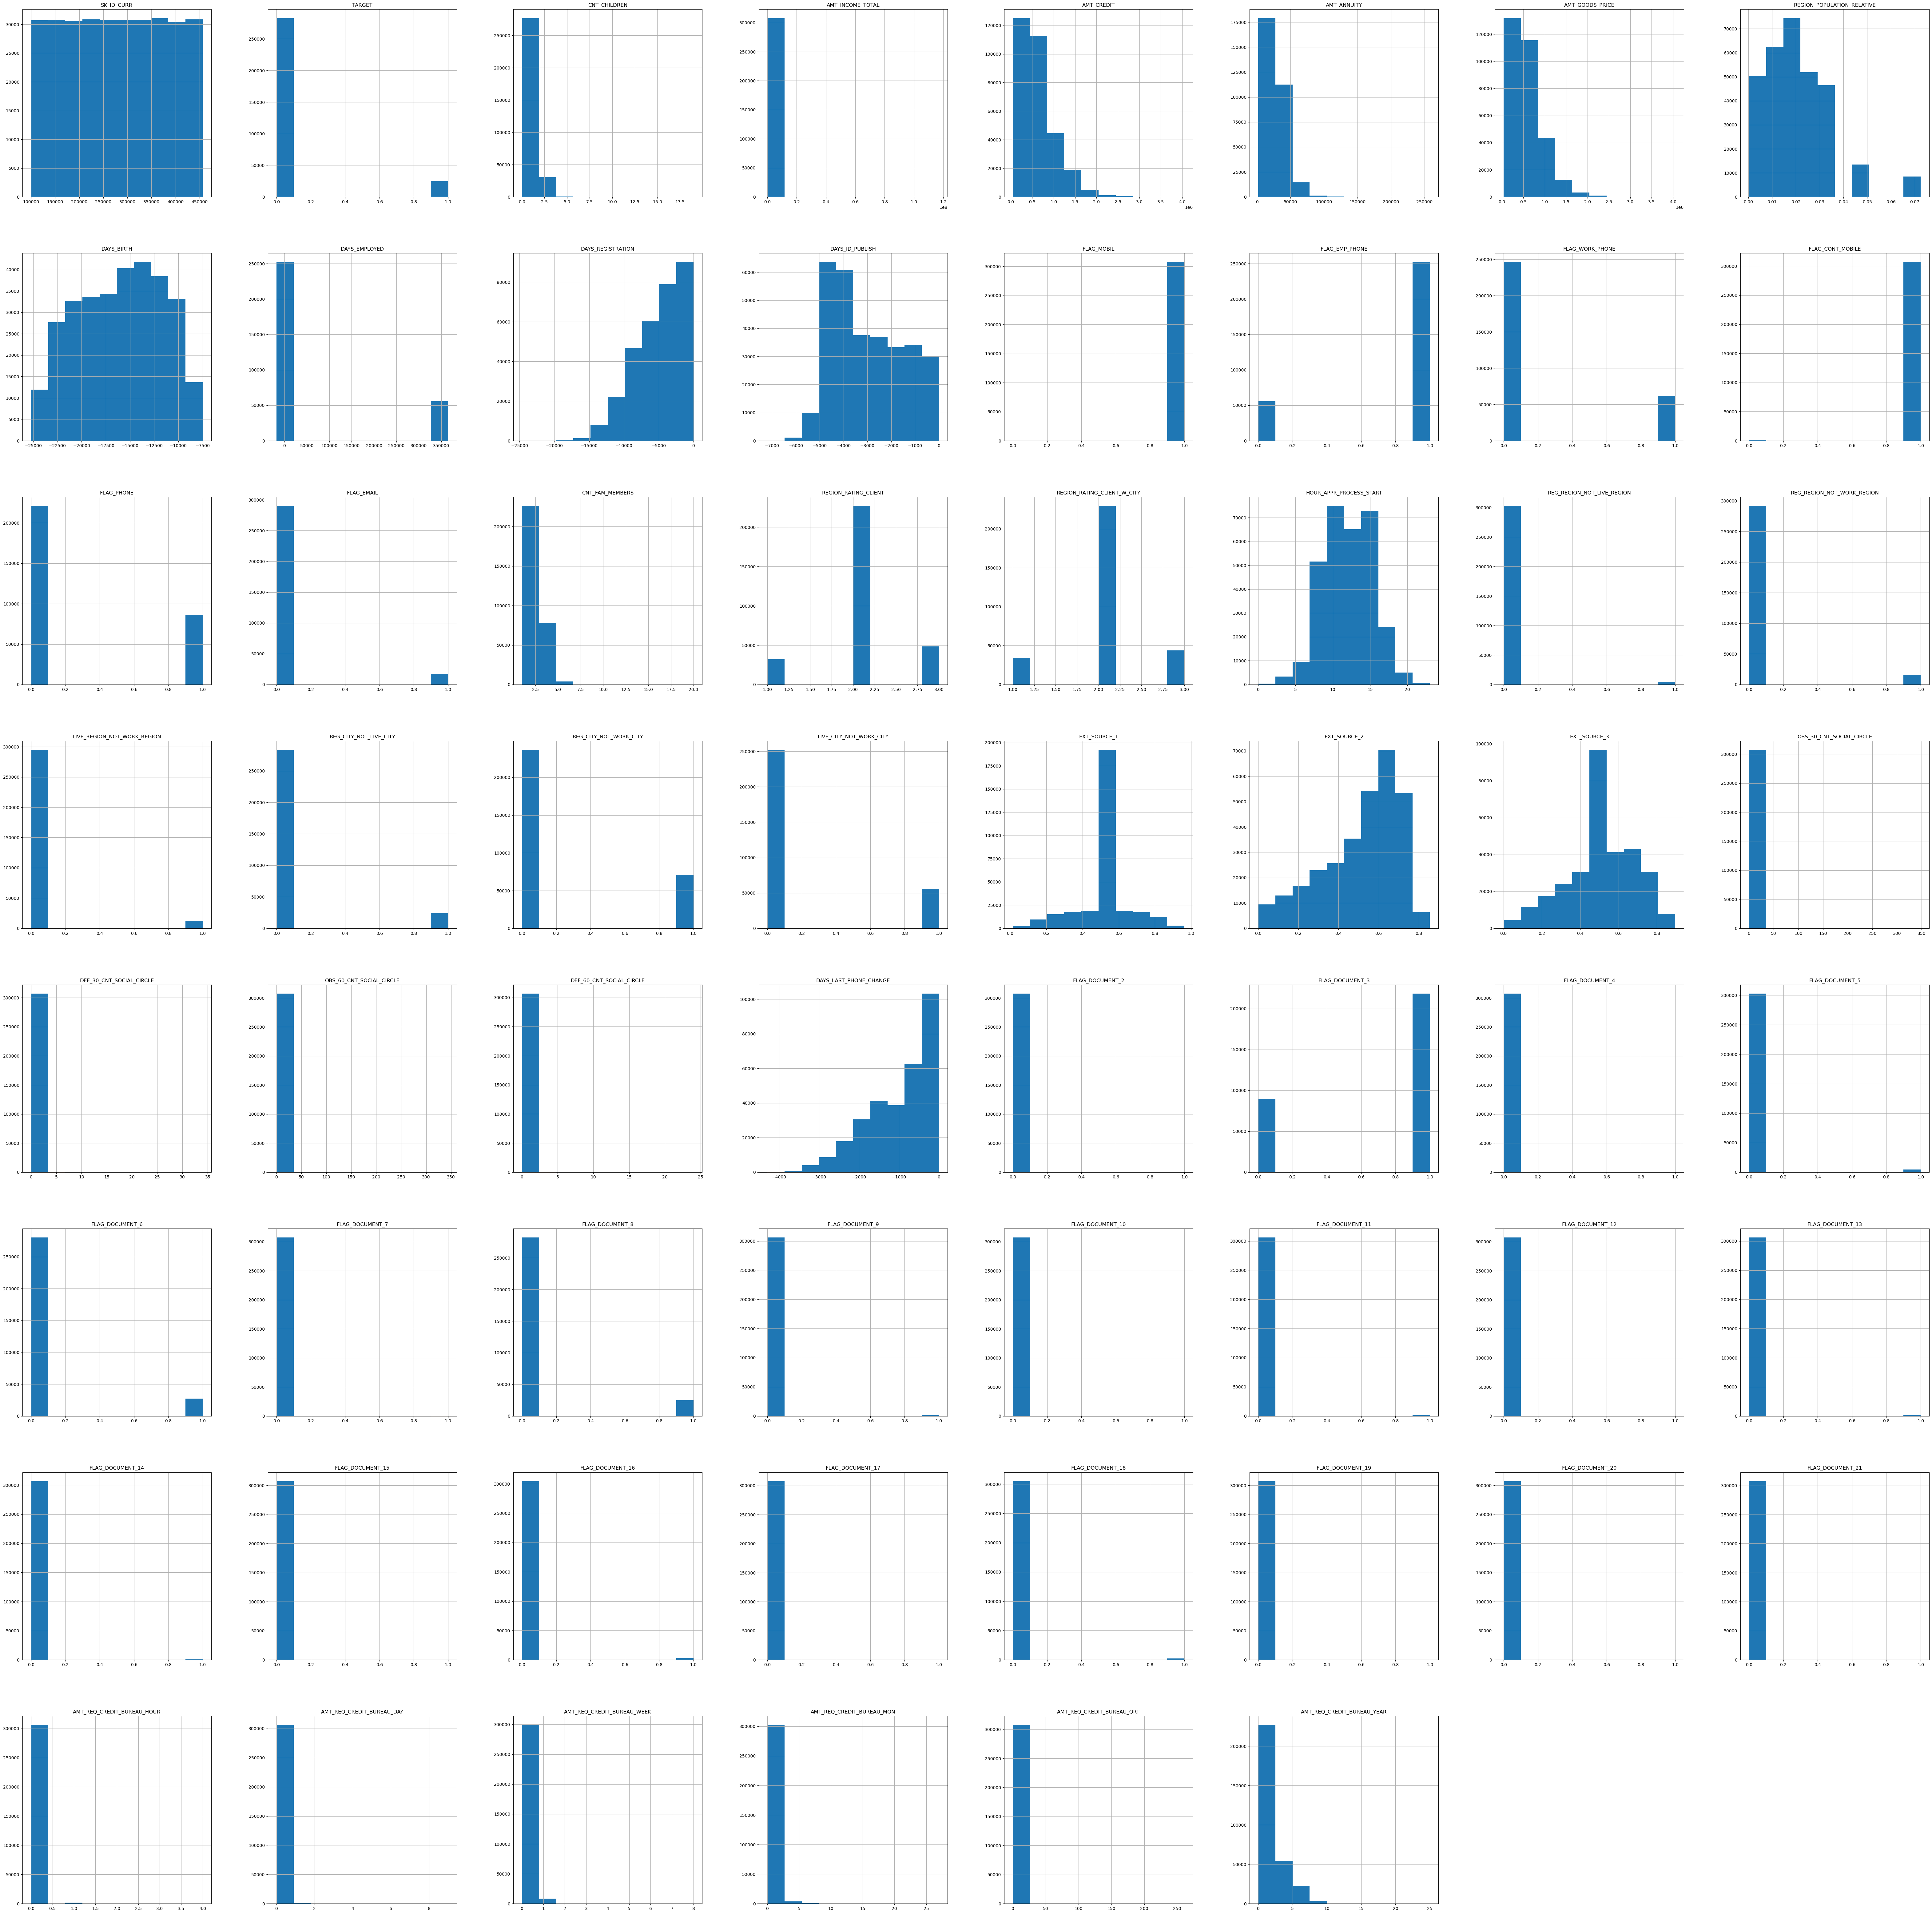

In [15]:
# plotting a histogram for all predictors
application_train_clean.hist(figsize=(80,80))
plt.show()


**The above plot shows that there are several columns with just 1 or 2 unique values and they are highly imbalanced. Let's analyze these columns and then take a decision of dropping them.**

###  Treating Low Variability columns

Few columns have a very large proportion of values having the same value. These columns do not help for model development as they dont offer any variability and can safely be removed.



In [16]:
selected_columns = []

# displaying columns along with a proportion of the unique values
for column in application_train_clean.columns:
    unique_values = application_train_clean[column].value_counts()
    total_count = len(application_train_clean)
    if len(unique_values) < 3: # Unique values less than 3 in a column
        proportions = unique_values / total_count
        if any(proportions > 0.98):  # Check if any proportion is above 0.95
            column_info = {
                "Column": column,
                "Proportions": proportions
            }
            selected_columns.append(column_info['Column'])
            print(f"Column: {column}")
            print("Proportions:")
            print(proportions)
            print("\n")

Column: FLAG_MOBIL
Proportions:
1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64


Column: FLAG_CONT_MOBILE
Proportions:
1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64


Column: REG_REGION_NOT_LIVE_REGION
Proportions:
0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


Column: EMERGENCYSTATE_MODE
Proportions:
No     0.99243
Yes    0.00757
Name: EMERGENCYSTATE_MODE, dtype: float64


Column: FLAG_DOCUMENT_2
Proportions:
0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64


Column: FLAG_DOCUMENT_4
Proportions:
0    0.999919
1    0.000081
Name: FLAG_DOCUMENT_4, dtype: float64


Column: FLAG_DOCUMENT_5
Proportions:
0    0.984885
1    0.015115
Name: FLAG_DOCUMENT_5, dtype: float64


Column: FLAG_DOCUMENT_7
Proportions:
0    0.999808
1    0.000192
Name: FLAG_DOCUMENT_7, dtype: float64


Column: FLAG_DOCUMENT_9
Proportions:
0    0.996104
1    0.003896
Name: FLAG_DOCUMENT_9, dtype: float64


Column: FLAG_DOCUMENT_10
Propor

In [17]:
len(selected_columns)

21

In [18]:
# Dropping the selected columns with less variability
application_train_clean = application_train_clean.drop(columns=selected_columns, axis=1)
application_train_clean.shape

(307511, 57)

### **Treating Multicollinearity**

Lets have a threshold of 70% for Multi-collinearity

In [19]:
corr_matrix = application_train_clean.corr()
threshold = 0.7

# Find the pairs of variables with a correlation greater than the threshold
multicollinear_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            multicollinear_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Display the multicollinear pairs
print("Multicollinear Pairs:")
for pair in multicollinear_pairs:
  print(pair)

Multicollinear Pairs:
('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_CREDIT', 'AMT_ANNUITY')
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('AMT_ANNUITY', 'AMT_GOODS_PRICE')
('DAYS_EMPLOYED', 'FLAG_EMP_PHONE')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION')
('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY')
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')
('DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')


In [20]:
# Calculate the correlation of the multicollinear pairs with the 'TARGET' variable
correlation_with_target = {}
for pair in multicollinear_pairs:
    corr_column1 = application_train_clean[pair[0]].corr(application_train_clean['TARGET'])  # Calculate correlation with 'TARGET' for column 1
    corr_column2 = application_train_clean[pair[1]].corr(application_train_clean['TARGET'])  # Calculate correlation with 'TARGET' for column 2
    correlation_with_target[pair] = (corr_column1, corr_column2)

# Display the multicollinear pairs and their correlations with 'TARGET'
print("Multicollinear Pairs and Their Correlations with 'TARGET':")
for pair, corrs in correlation_with_target.items():
    print(f"Pair: {pair}, Correlation with 'TARGET' - Column 1: {corrs[0]:.2f}, Column 2: {corrs[1]:.2f}")

Multicollinear Pairs and Their Correlations with 'TARGET':
Pair: ('CNT_CHILDREN', 'CNT_FAM_MEMBERS'), Correlation with 'TARGET' - Column 1: 0.02, Column 2: 0.01
Pair: ('AMT_CREDIT', 'AMT_ANNUITY'), Correlation with 'TARGET' - Column 1: -0.03, Column 2: -0.01
Pair: ('AMT_CREDIT', 'AMT_GOODS_PRICE'), Correlation with 'TARGET' - Column 1: -0.03, Column 2: -0.04
Pair: ('AMT_ANNUITY', 'AMT_GOODS_PRICE'), Correlation with 'TARGET' - Column 1: -0.01, Column 2: -0.04
Pair: ('DAYS_EMPLOYED', 'FLAG_EMP_PHONE'), Correlation with 'TARGET' - Column 1: -0.04, Column 2: 0.05
Pair: ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'), Correlation with 'TARGET' - Column 1: 0.06, Column 2: 0.06
Pair: ('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'), Correlation with 'TARGET' - Column 1: 0.01, Column 2: 0.00
Pair: ('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'), Correlation with 'TARGET' - Column 1: 0.05, Column 2: 0.03
Pair: ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'),

**The above output shows that these highly collinear column pairs have poor correlation with the target variable. But correlation of 0.03 can be considered for this dataset. Removing only columns with less than 0.03.**

In [21]:
# Dropping multicollinear columns with correlation less than 0.03
drop_columns = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']

application_train_final = application_train_clean.drop(drop_columns, axis=1)
application_train_final.shape

#application_train_final.columns

(307511, 50)

## 7. Bivariate Analysis

By doing bivariate analysis lets test the below Hypothesis:

1. Ideally Males take more loans and are more suscept to having difficulty in loan repayment.
2. Low skilled workers such as Laborers have the highest loan repayment difficulty.
3. As loan credit amount increases, the chance of default increases.
4. Higher age customers in general have higher chances of default.

### Hypothesis - 1: Males have more loan repayment difficulties than Females

Text(0.5, 1.0, 'Count of Target by Gender')

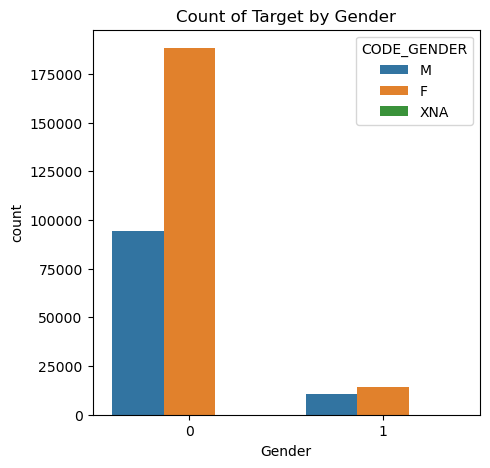

In [22]:
# Countplot of target variable with respect to gender
fig,ax = plt.subplots(figsize = (5,5))
sns.countplot(x='TARGET',data=application_train,hue='CODE_GENDER')
plt.xlabel("Gender")
plt.title("Count of Target by Gender")

In [23]:
# Checking the number of rows with gender XNA
application_train_final[application_train_final['CODE_GENDER']=='XNA']['TARGET']

35657     0
38566     0
83382     0
189640    0
Name: TARGET, dtype: int64

**Suprisingly, it is Females who have taken more loans and are nearly double of Males for non-defaulters. For those with having a difficulty in repayment, Females again are more than Males by a small figure.**

### Hypothesis - 2: Low skilled workers such as Laborers have the highest loan repayment difficulty

Text(0.5, 1.0, 'Count of Target by Occupation Type')

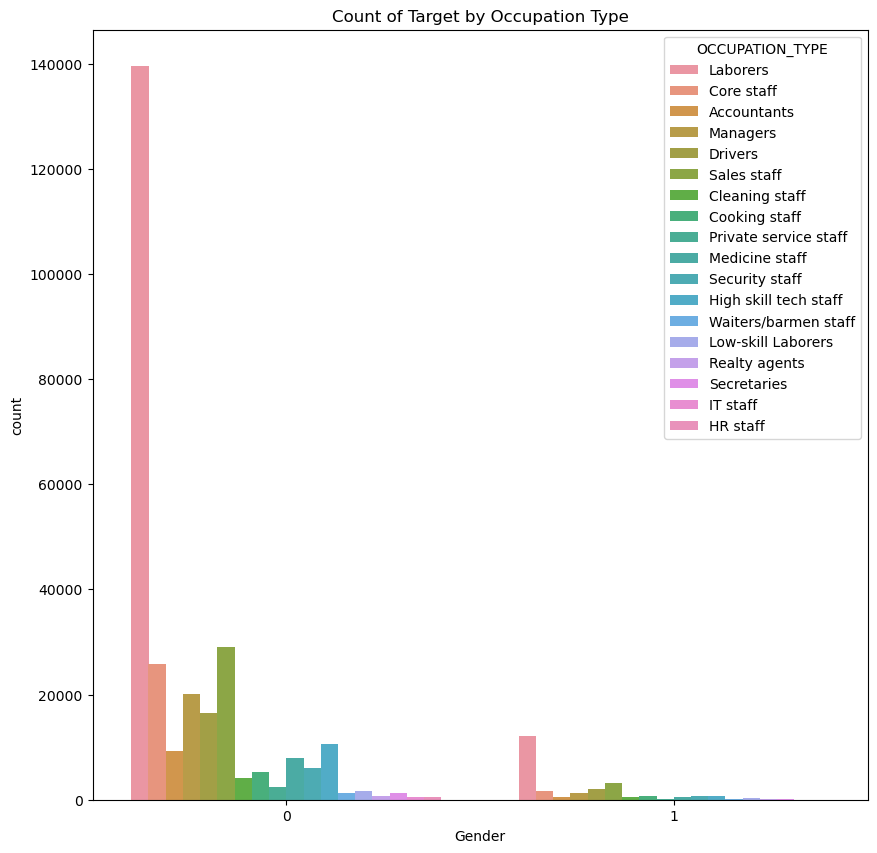

In [24]:
# Countplot of target variable with respect to OCCUPATION_TYPE
application_train_final['OCCUPATION_TYPE'].head(2)

fig,ax = plt.subplots(figsize = (10,10))
sns.countplot(x='TARGET',data=application_train_final,hue='OCCUPATION_TYPE')
plt.xlabel("Gender")
plt.title("Count of Target by Occupation Type")

Text(0.5, 1.0, 'Count of Occupation Type for defaulters')

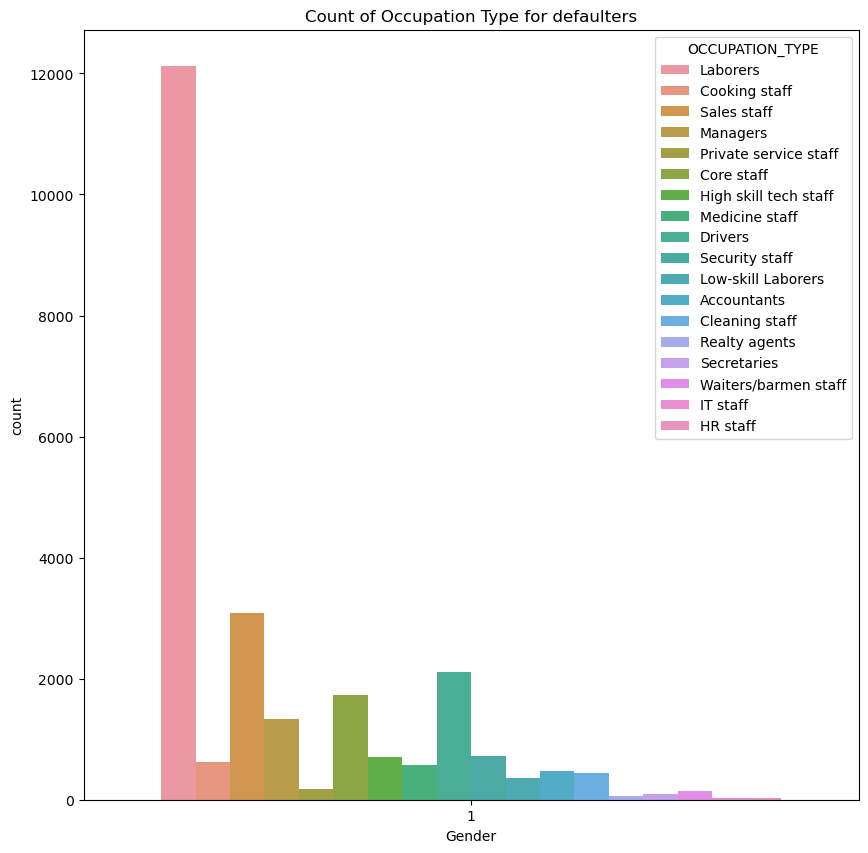

In [25]:
# Extracting target variable value of 1
fig,ax = plt.subplots(figsize = (10,10))
sns.countplot(x='TARGET', data=application_train_final[application_train_final['TARGET']==1],hue='OCCUPATION_TYPE')
plt.xlabel("Gender")
plt.title("Count of Occupation Type for defaulters")

**Yes, the above plot shows that laborers, drivers and sales staff all have a good percentage of loan defaults.**

### Hypothesis 3: As loan credit amount increases, the chance of default increases

Text(0.5, 1.0, 'Target vs Amount of Credit')

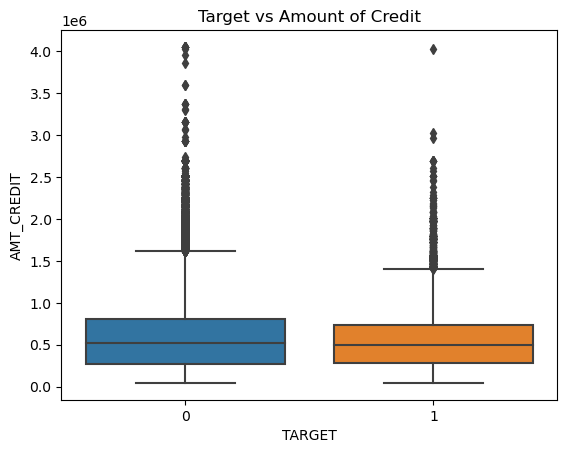

In [26]:
# Boxplot of target variable with respect to AMT_CREDIT
sns.boxplot(application_train, x='TARGET', y='AMT_CREDIT')
plt.title("Target vs Amount of Credit")

Text(0.5, 1.0, 'Target vs Amount of Credit')

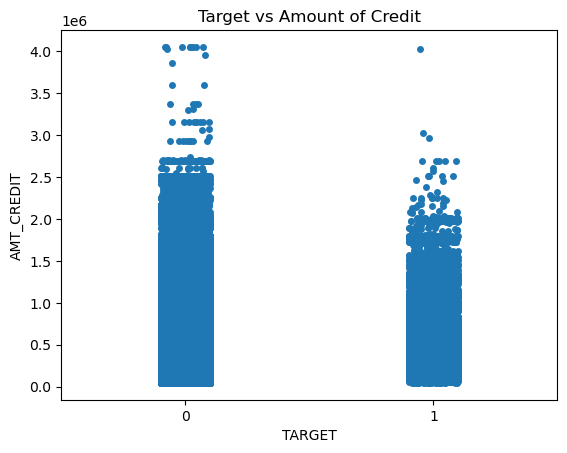

In [27]:
# Strip plot of the same
sns.stripplot(application_train, x='TARGET', y='AMT_CREDIT')
plt.title("Target vs Amount of Credit")

**This is interesting. There is not much of a difference and in fact it looks like greater proportion of high loan credit amount linked consumers have repaid their loans.**

### Hypothesis 4: Higher age customers have higher chance of default

Text(0.5, 1.0, 'Target vs Age')

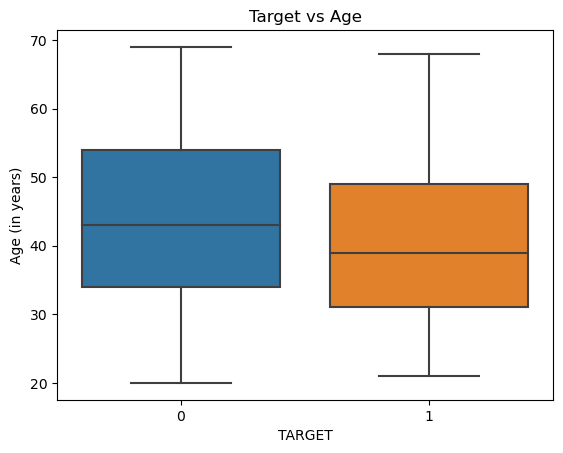

In [28]:
#Testing for Higher age customers have higher chance of default
application_train_final['Year']= (application_train['DAYS_BIRTH'] / (-365)).astype(int)
sns.boxplot(application_train_final, x='TARGET', y='Year')
plt.ylabel('Age (in years)')

plt.title("Target vs Age")

**The hypothesis stands good as higher age customers have higher chance of default.**

## 8. Joining the Bureau Table

Lets inspect the data before joining:

In [29]:
# column info
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [30]:
# summary table
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [31]:
# checking null values 
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

**Looks like there's a lot of missing values in the bureau dataset columns. These need to be either imputed or left out from the input parameters to most of the predictive models later on.**

**Lets do a inner join between bureau and application train to have only those consumers who have previous credit history. This is just for the purpose of EDA. Before devloping models we might have to perform a left join to prevent data loss (consumers who dont have a credit background).**

In [32]:
# inner join and checking DF shape
app_bur = application_train_final.merge(bureau, on='SK_ID_CURR')
app_bur.shape

(1465325, 67)

In [33]:
# correlation matrix
app_bur_cor = pd.DataFrame(app_bur.corr())
app_bur_cor = app_bur_cor.sort_values('TARGET',ascending=False)

In [34]:
# correlation
app_bur_cor = app_bur_cor['TARGET']
app_bur_cor= pd.DataFrame(app_bur_cor)
app_bur_cor=app_bur_cor.iloc[1:,]
app_bur_cor.head(5)

,TARGET
DAYS_BIRTH,0.066888
DAYS_CREDIT,0.061556
REGION_RATING_CLIENT_W_CITY,0.050320
REGION_RATING_CLIENT,0.048372
DAYS_ID_PUBLISH,0.042199


Text(0, 0.5, 'DAYS_CREDIT')

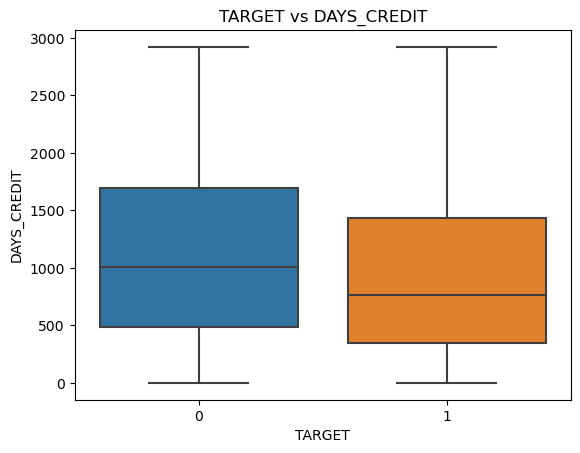

In [35]:
# Target vs Days Credit
app_bur['DAYS_CREDIT_1'] = (app_bur['DAYS_CREDIT']/(-1)).astype(int)
sns.boxplot(data=app_bur, x='TARGET',y='DAYS_CREDIT_1')
plt.title('TARGET vs DAYS_CREDIT')
plt.ylabel('DAYS_CREDIT')

**DAYS_CREDIT indicates how many days before current application did the client apply for Credit. From the plot above, we see that more the number of days, less is the chance to default.**

Inspecting Previous Application Dataset before joining to the app_bur dataframe.

In [36]:
# preview
prev_app.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [37]:
# column info
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [38]:
# checking null values
prev_app.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [39]:
# inner join
app_bur_prev = app_bur.merge(prev_app, on='SK_ID_CURR',how='inner')
app_bur_prev.shape

(7854631, 104)

## 9. Data Transformation - One Hot encoding

In [40]:
# Finding dtypes 
app_bur_prev.dtypes.value_counts()

float64    40
object     34
int64      28
int32       2
dtype: int64

**There are 16 categorical variables in the dataset that needs to be converted to numeric values to be able to apply most of the ML models. Using One Hot Encoding to encode these 16 predictors:**

In [41]:
# Get Dummies
app_bur_prev_encoded = pd.get_dummies(app_bur_prev)
app_bur_prev_encoded.dtypes.value_counts()

uint8      300
float64     40
int64       28
int32        2
dtype: int64

## 10. EDA Summary & Next Steps

**We observed that there are over a hundred columns in the application train dataset and hence Exploratory Data Analysis was necessary to trim down features, impute missing values, transform data all of which ensures good quality ML models. We have gained several insights on the dataset through EDA and below is a summary of it:**

**1. The majority class accuracy is 91.92%. This also will be the accuracy benchmark for the classification models.**

**2. Days birth are the most positively correlated while external sources 3,2 & 1 are the most negatively correlated features to the target variable.**

**3. Columns with missing values more than 48% were dropped except for external source 1 with the rest of values being imputed by either mode or median depending on the variable data type.**

**4. Through Univariate analysis, we identified 21 features that offer near to 0 variability and these were dropped.**

**5. Further 7 columns were dropped for causing multi-collinearity.**

**6. Through Bivariate analysis, we tested for various hypothesis and found that females have taken more loans and are double the number of defaulters when compared to men. We verified that laborers, drivers and sales staff all have higher percentage of loan defaults. Also, while large credit amount doesn't really mean higher chances of default while higher age certainly is a decent sign of a defaulter.**

**7. We observed a large number of missing values in the bureau and previous application datasets.**

### Next Steps

**1. Since, the target variable is imbalanced, stratified sampling technique needs to be while creating train and test sets to ensure that these subsets maintain a similar proportion.**


**2. If at all we decide to use columns from bureau or prvious application, treat the missing values appropriately.**


**3. Before splitting into train and test sets, scale and standardize the numeric columns.**


**4. Come-up with a baseline model and check for feature importance and accordingly eliminate more and more columns. The idea is to make accurate default predictions using as few predictors as possible.**


**5. Develop Random Forrest, KNN and Gradient Boosting models and compute classification metrics. Test for overfitting. This could possibly achieved by bootstrap sampling and calculating out of bag score.**


**6. Compare the ROC-AUC curve and identify the best model. Use this model to predict the values with the test set. Submit and obtain the Kaggle score.**

**7. Also perform outlier analysis either using z-score, plotting and/or 3 standard deviations to detect rows that have an outier. These outliers cannot directly be removed. Additional EDA might be necessary to deal with outliers and to find if they are differenty correlated with the target variable which might pave a way to newer insights.**

<center><a href="#1.-Introduction">Navigate to Top</a>